In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref=zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-12-08 18:28:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 74.125.196.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   135MB/s    in 0.8s    

2022-12-08 18:28:56 (135 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os
#listing directories
print(os.listdir("pizza_steak"))
print(os.listdir("pizza_steak/train"))
print(os.listdir("pizza_steak/train/pizza"))

['train', 'test']
['steak', 'pizza']
['2241448.jpg', '959901.jpg', '1654444.jpg', '647215.jpg', '2236914.jpg', '712149.jpg', '3392649.jpg', '1681043.jpg', '1998483.jpg', '2502234.jpg', '3653528.jpg', '1284978.jpg', '2529205.jpg', '228778.jpg', '3326344.jpg', '3462250.jpg', '38349.jpg', '1665654.jpg', '221048.jpg', '320570.jpg', '1980167.jpg', '3281494.jpg', '3055697.jpg', '904938.jpg', '1008941.jpg', '1608000.jpg', '3434372.jpg', '2821048.jpg', '1248346.jpg', '2456207.jpg', '1173913.jpg', '13983.jpg', '1633289.jpg', '1245628.jpg', '203831.jpg', '3427699.jpg', '3196721.jpg', '2584745.jpg', '1573562.jpg', '857888.jpg', '1593665.jpg', '2967846.jpg', '2476468.jpg', '72716.jpg', '375401.jpg', '424288.jpg', '3871666.jpg', '2754150.jpg', '175626.jpg', '54540.jpg', '3798959.jpg', '2421445.jpg', '1912976.jpg', '489347.jpg', '517902.jpg', '608085.jpg', '2188452.jpg', '1269960.jpg', '1717790.jpg', '169720.jpg', '3105724.jpg', '920219.jpg', '3873326.jpg', '2304021.jpg', '1512514.jpg', '2135635.jpg

In [ ]:
import pathlib
import numpy as np
#class names
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([items.name for items in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

def random_image_view(target_dir, target_class):
    target_folder=target_dir+target_class
    random_img=random.sample(os.listdir(target_folder), 1)
    img=mpimg.imread(target_folder+"/"+random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(img.shape)
    return img

(512, 512, 3)
tf.Tensor(
[[[ 50  18  19]
  [ 47  15  16]
  [ 45  13  14]
  ...
  [ 38  14  10]
  [ 37  13   9]
  [ 36  13   7]]

 [[ 45  13  14]
  [ 44  12  13]
  [ 43  11  12]
  ...
  [ 36  12   8]
  [ 36  12   8]
  [ 35  11   7]]

 [[ 45  11  12]
  [ 45  11  12]
  [ 44  10  11]
  ...
  [ 35  11   9]
  [ 35  11   9]
  [ 34  10   8]]

 ...

 [[204 149  32]
  [209 154  38]
  [213 160  48]
  ...
  [196 115  88]
  [214 137 109]
  [220 144 118]]

 [[203 151  29]
  [208 156  36]
  [214 163  48]
  ...
  [184 103  76]
  [199 122  94]
  [203 127 101]]

 [[204 153  26]
  [208 158  35]
  [214 165  47]
  ...
  [173  92  63]
  [184 107  79]
  [188 112  86]]], shape=(512, 512, 3), dtype=uint8)


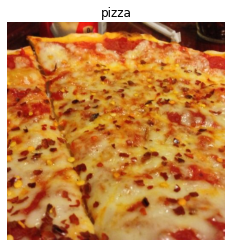

In [ ]:
print(tf.constant(random_image_view("pizza_steak/train/","pizza")))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

train_data=train_datagen.flow_from_directory(
                                              directory=train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              #batch_size=32,
                                              )
test_data=test_datagen.flow_from_directory(
                                            directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            #batch_size=32,
                                            )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels= train_data.next() #next is used to get next batch # 0-pizza 1-steak

In [ ]:
#model_1
model_1=tf.keras.Sequential([tf.keras.layers.Conv2D(30, 3, activation="relu", input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(20, 3, activation="relu"),
                              tf.keras.layers.Conv2D(10, 2, activation="relu"),
                              tf.keras.layers.Conv2D(5, 2, activation="relu"),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid"),
                            ]) #val_accuracy: 0.7760

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

history_1=model_1.fit(train_data,
            batch_size=32,
            epochs=10,
            #steps_per_epoch=len(train_data),
            validation_data=test_data,
            #validation_steps=len(test_data),
            )

Epoch 1/10
 2/47 [>.............................] - ETA: 6:31 - loss: 0.9078 - accuracy: 0.4531

In [ ]:
def history_plot(his):
    
    epochs=np.arange(len(his.history["loss"]))
    plt.figure(figsize=(10,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs, his.history["loss"], label="train_loss")
    plt.plot(epochs, his.history["val_loss"], label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs, his.history["accuracy"], label="train_accuracy")
    plt.plot(epochs, his.history["val_accuracy"], label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

In [ ]:
#model_2
model_2=tf.keras.Sequential([tf.keras.layers.Conv2D(30, 3, activation="relu"),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(20, 3, activation="relu"),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(10, 2, activation="relu"),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(5, 2, activation="relu"),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid"),
                            ]) #val_accuracy: 0.8500

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

history_2=model_2.fit(train_data,
            batch_size=32,
            epochs=10,
            validation_data=(test_data),
            )

In [ ]:
history_plot(history_1)

In [ ]:
history_plot(history_2)

In [ ]:
train_augumented_datagen=ImageDataGenerator(rescale=1/255,
                                            rotation_range=5,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.3,
                                            zoom_range=0.1,
                                            horizontal_flip=True,
                                            )

train_data_aug= train_augumented_datagen.flow_from_directory(directory= train_dir,
                                                              target_size=(224,224),
                                                              class_mode="binary",
                                                              )

In [ ]:
images_aug, labels_aug= train_data_aug.next()

In [ ]:
#visualisation of augumented data
r_n=random.randint(0,32)

plt.Figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(images[r_n])
plt.subplot(1,2,2)
plt.imshow(images_aug[r_n])

In [ ]:
#model_3
model_3=tf.keras.Sequential([tf.keras.layers.Conv2D(30, 3, activation="relu"),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(20, 3, activation="relu"),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(10, 2, activation="relu"),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Conv2D(5, 2, activation="relu"),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1, activation="sigmoid"),
                              ]) #val_accuracy: 0.7680

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

history_3=model_3.fit(train_data_aug,
            batch_size=32,
            epochs=10,
            validation_data=(test_data),
            )

history_plot(history_3)

In [ ]:
print(model_1.summary())

In [ ]:
print(model_2.summary())

In [ ]:
print(model_3.summary())

In [ ]:
!wget https://www.tastingtable.com/img/gallery/15-ingredients-that-will-seriously-elevate-your-steak/l-intro-1663169111.jpg

In [ ]:
#checking for custom data

path=("l-intro-1663169111.jpg")
img=tf.io.read_file(path)
img=tf.image.decode_image(img, channels=3)
img=tf.image.resize(img, size=[224,224])
img=img/255
img=tf.expand_dims(img, axis=0)

print("Model_1 prediction:",model_1.predict(img))
print("Model_2 predictions",model_2.predict(img))
print("Model_3 predictions",model_3.predict(img))